# Statistical Learning Assignment 5

CHAPTER 9 EXERCISE 1: This problem involves hyperplanes in two dimensions.

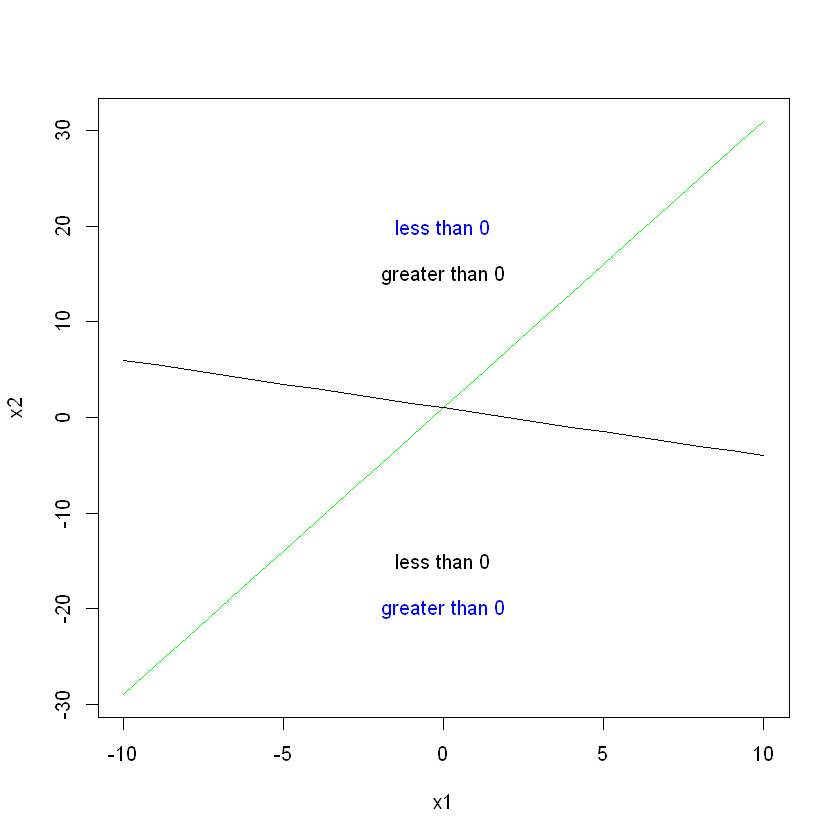

In [5]:
#Exercise 1:Sketch the hyperplane 1 + 3X1 − X2 = 0. Indicate the set of points for which 1 + 3X1 − X2 > 0, as well as the set of points
#for which 1 + 3X1 − X2 < 0.
x1 = -10:10
x2 = 1 + 3 * x1
plot(x1, x2, type = "l", col = "green")
text(c(0), c(-20), "greater than 0", col = "blue")
text(c(0), c(20), "less than 0", col = "blue")
lines(x1, 1 - x1/2)
text(c(0), c(-15), "less than 0")
text(c(0), c(15), "greater than 0")

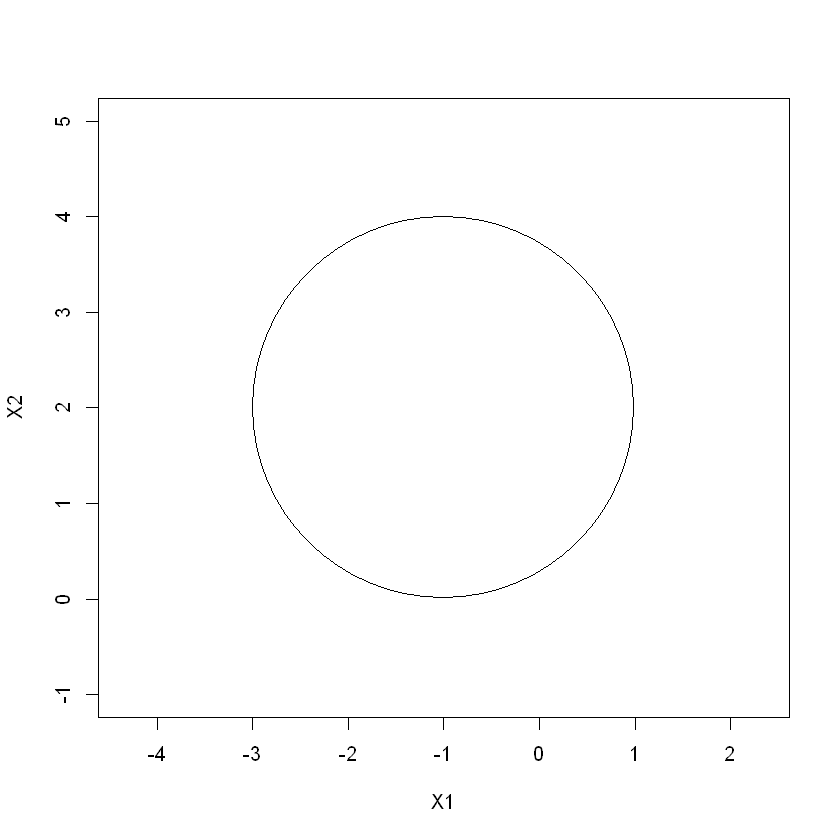

In [7]:
#Exercise 2:We have seen that in p = 2 dimensions, a linear decision boundary takes the form β0+β1X1+β2X2 = 0.
#Exercise 2A:Sketch the curve (1 + X1)2 + (2 − X2)2 = 4.
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

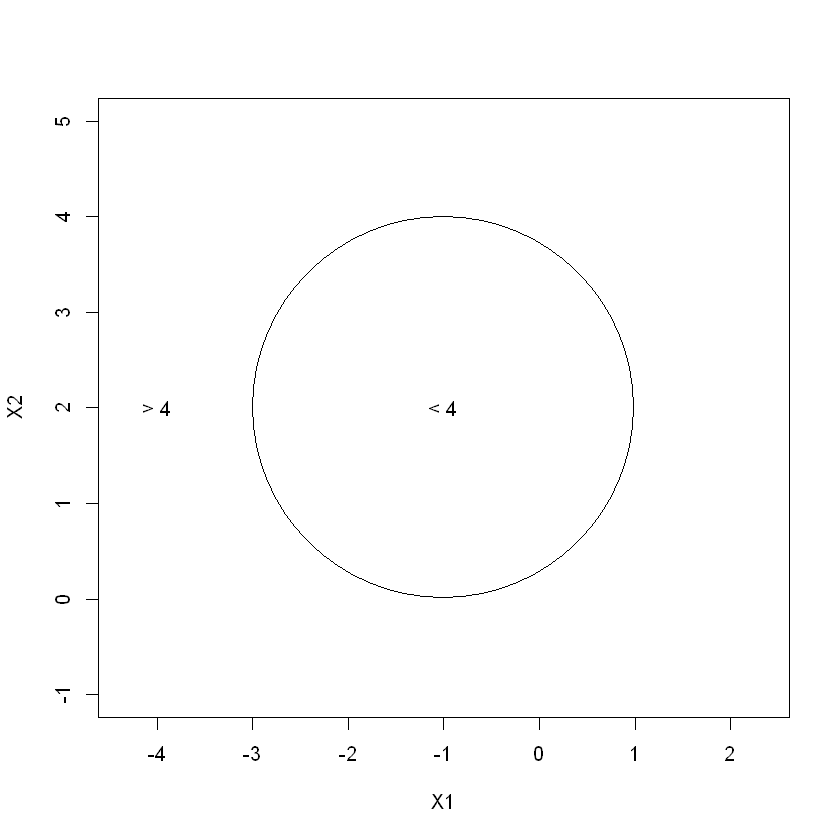

In [8]:
#Exercise 2B:On your sketch, indicate the set of points for which (1 + X1)2 + (2 − X2)2 > 4, as well as the set of points for which (1 + X1)2 + (2 − X2)2 ≤ 4.
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

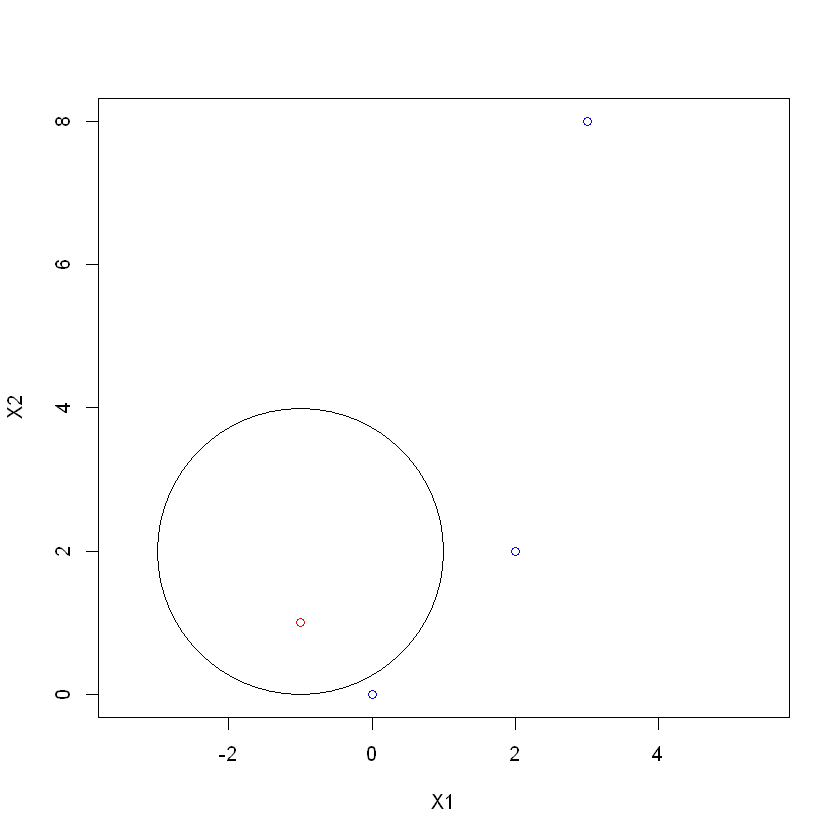

In [10]:
#Exercise 2C:Suppose that a classifier assigns an observation to the blue class if (1 + X1)2 + (2 − X2)2 > 4, and to the red class otherwise. To what class is the observation
#(0, 0) classified? (−1, 1)? (2, 2)? (3, 8)?
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(2), add = TRUE, inches = FALSE)

Exercise 2D:Argue that while the decision boundary in (c) is not linear in terms of X1 and X2, it is linear in terms of X1, X2 1 , X2, and X2 2 .

We can elaborate on the formula 
(1+X1)2+(2−X2)2=4
And then 
X21+X22+2X1−4X2+1=0
which is linear in terms of X1, X21, X2 and x22.

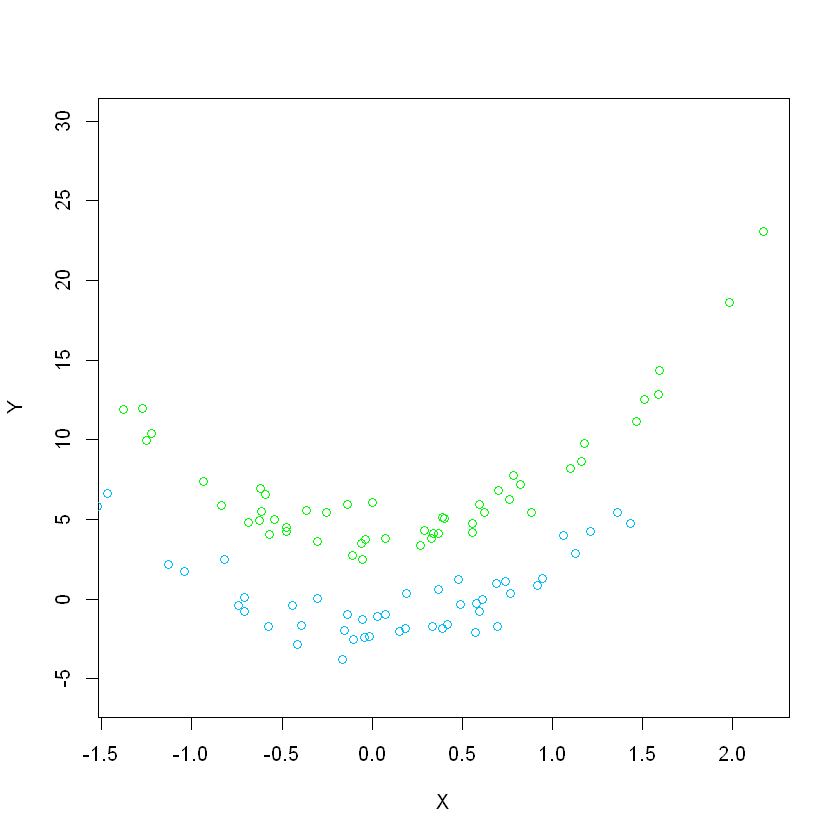

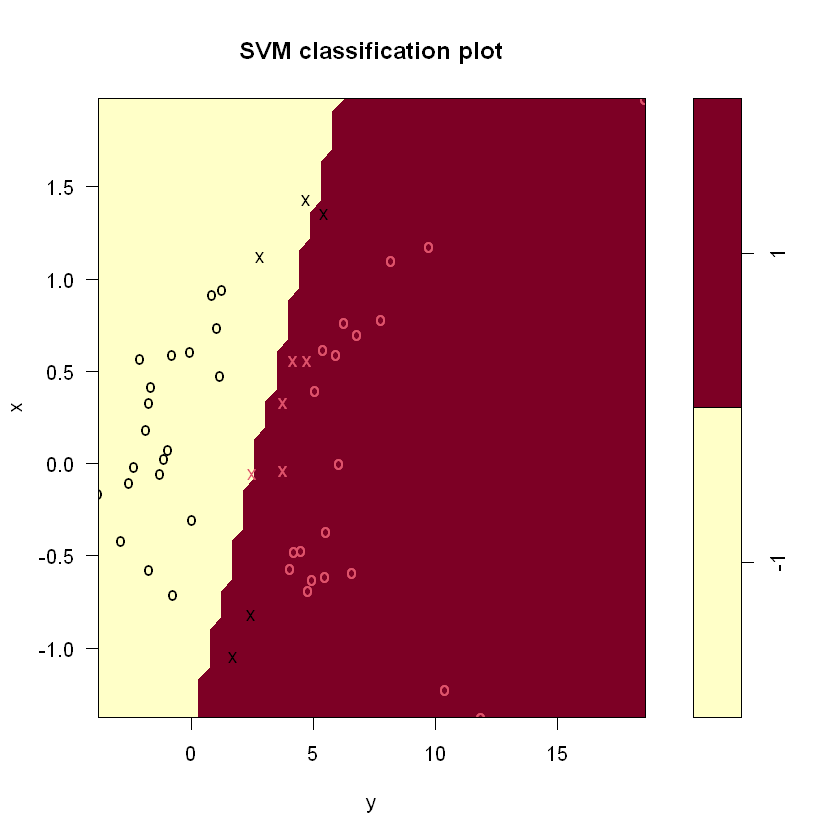

In [15]:
#Library used for assignment
library(e1071)
#Exercise 4: Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes.
#Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data.
set.seed(1)
x <- rnorm(100)
y <- 4 * x^2 + 1 + rnorm(100)
classy <- sample(100, 50)
y[classy] <- y[classy] + 3
y[-classy] <- y[-classy] - 3
plot(x[classy], y[classy], col = "green", xlab = "X", ylab = "Y", ylim = c(-6, 30))
points(x[-classy], y[-classy], col = "deepskyblue")

z <- rep(-1, 100)
z[classy] <- 1
data <- data.frame(x = x, y = y, z = as.factor(z))
train <- sample(100, 50)
data.train <- data[train, ]
data.test <- data[-train, ]
svm.linear <- svm(z ~ ., data = data.train, kernel = "linear", cost = 10)
plot(svm.linear, data.train)

       truth
predict -1  1
     -1 22  0
     1   3 25

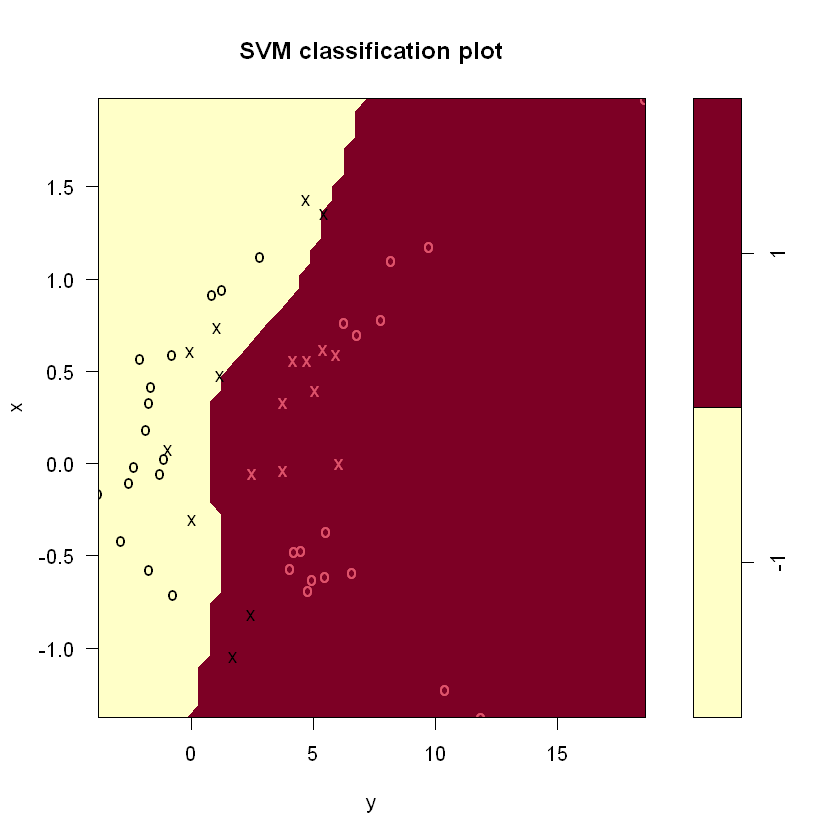

In [16]:
table(predict = predict(svm.linear, data.train), truth = data.train$z)

svm.poly <- svm(z ~ ., data = data.train, kernel = "polynomial", cost = 10)
plot(svm.poly, data.train)

       truth
predict -1  1
     -1 21  0
     1   4 25

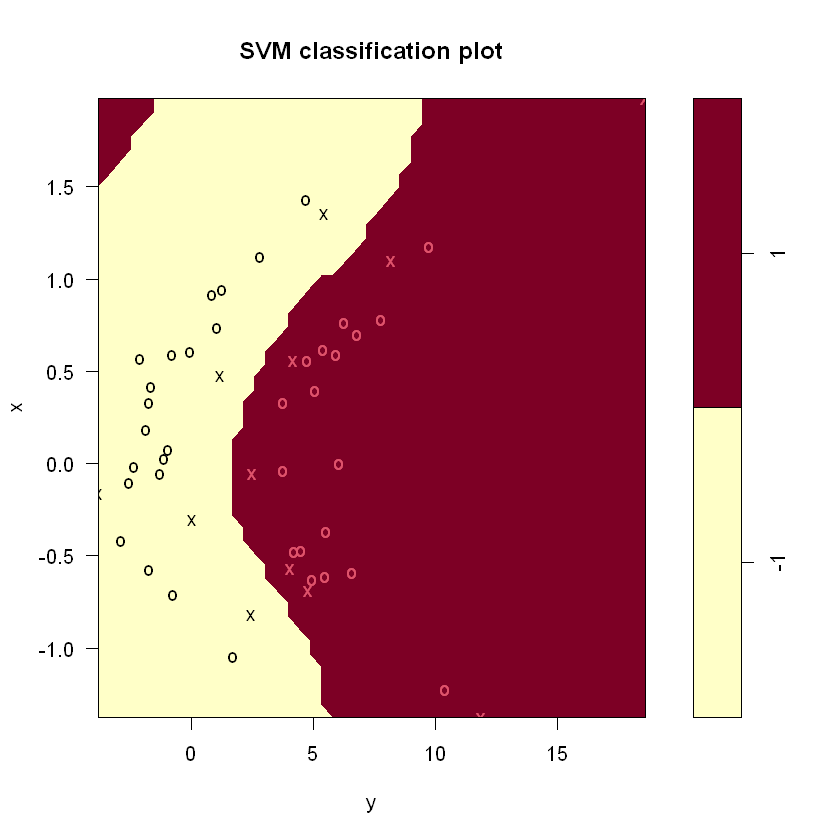

In [18]:
table(predict = predict(svm.poly, data.train), truth = data.train$z)

svm.radial <- svm(z ~ ., data = data.train, kernel = "radial", gamma = 1, cost = 10)
plot(svm.radial, data.train)

       truth
predict -1  1
     -1 25  0
     1   0 25

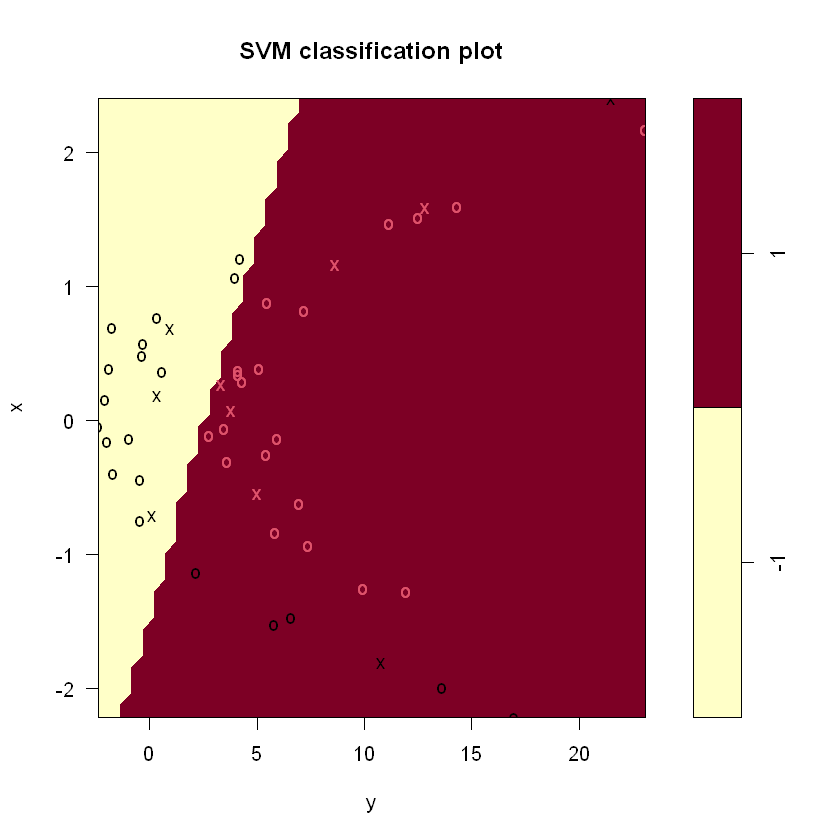

In [19]:
table(predict = predict(svm.radial, data.train), truth = data.train$z)

plot(svm.linear, data.test)

       truth
predict -1  1
     -1 18  0
     1   7 25

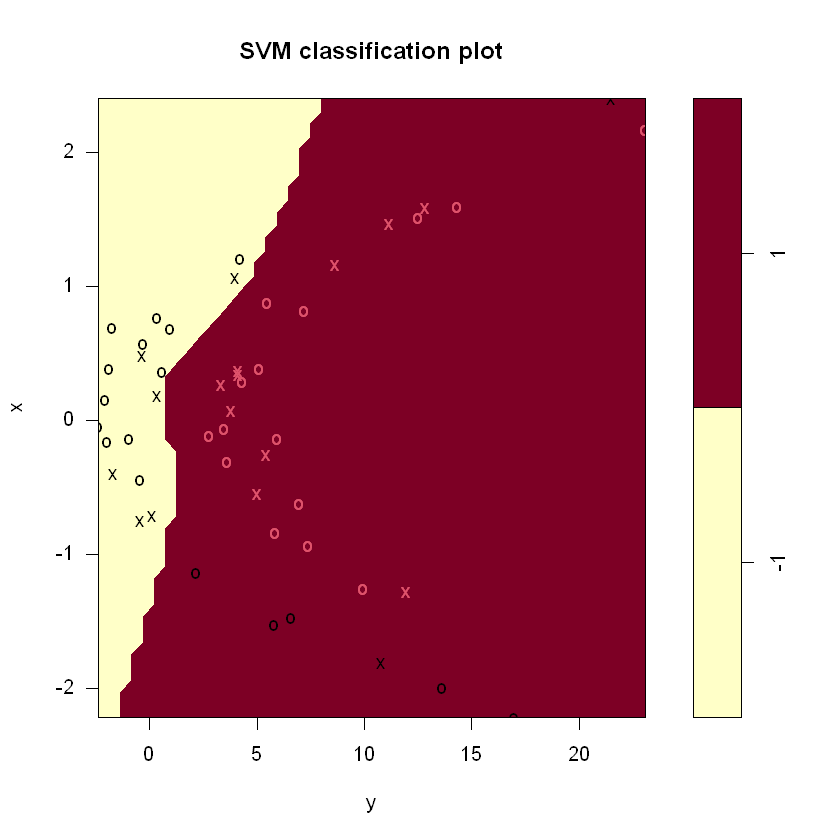

In [20]:
table(predict = predict(svm.linear, data.test), truth = data.test$z)
plot(svm.poly, data.test)

       truth
predict -1  1
     -1 18  0
     1   7 25

       truth
predict -1  1
     -1 19  0
     1   6 25

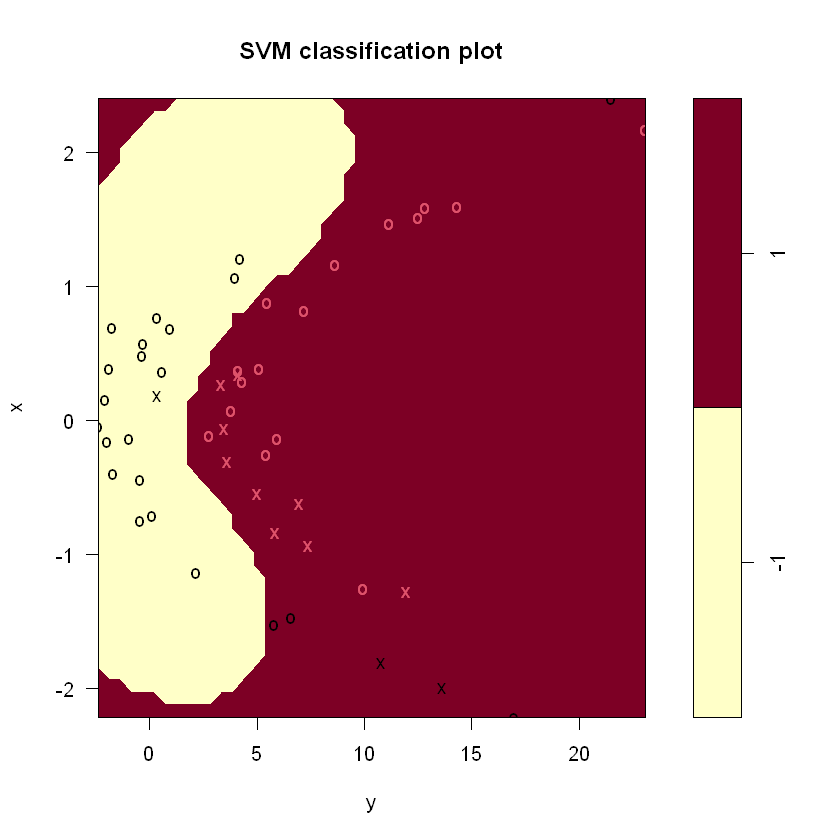

In [22]:
table(predict = predict(svm.poly, data.test), truth = data.test$z)
plot(svm.radial, data.test)

table(predict = predict(svm.radial, data.test), truth = data.test$z)

In [23]:
#Library for the exercise
library(ISLR)
#Exercise 9:In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set
#Exercise 9A:Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median
vary <- ifelse(Auto$mpg > median(Auto$mpg), 1, 0)
Auto$mpglevel <- as.factor(vary)

In [28]:
#Exercise 9B:Fit a support vector classifier to the data with various values of “cost”, in order to predict whether a car gets high of low gas mileage. 
set.seed(5)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "linear", ranges = list(cost = c(0.01, 0.1, 1, 7, 20, 100, 1000)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01019231 

- Detailed performance results:
   cost      error dispersion
1 1e-02 0.07391026 0.02208631
2 1e-01 0.04576923 0.02585417
3 1e+00 0.01019231 0.01786828
4 7e+00 0.02038462 0.02001214
5 2e+01 0.02807692 0.02230794
6 1e+02 0.03576923 0.03002696
7 1e+03 0.03576923 0.03002696


In [30]:
#Exercise 9C:Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cos
set.seed(2)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "polynomial", ranges = list(cost = c(0.01, 0.1, 1, 7, 20, 100), degree = c(2, 3, 4)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost degree
  100      2

- best performance: 0.2985256 

- Detailed performance results:
    cost degree     error dispersion
1  1e-02      2 0.5382051 0.01986881
2  1e-01      2 0.5382051 0.01986881
3  1e+00      2 0.5382051 0.01986881
4  7e+00      2 0.5382051 0.01986881
5  2e+01      2 0.4082051 0.06272654
6  1e+02      2 0.2985256 0.08119211
7  1e-02      3 0.5382051 0.01986881
8  1e-01      3 0.5382051 0.01986881
9  1e+00      3 0.5382051 0.01986881
10 7e+00      3 0.5382051 0.01986881
11 2e+01      3 0.5382051 0.01986881
12 1e+02      3 0.3395513 0.07752733
13 1e-02      4 0.5382051 0.01986881
14 1e-01      4 0.5382051 0.01986881
15 1e+00      4 0.5382051 0.01986881
16 7e+00      4 0.5382051 0.01986881
17 2e+01      4 0.5382051 0.01986881
18 1e+02      4 0.5382051 0.01986881


In [31]:
set.seed(2)
tune.out <- tune(svm, mpglevel ~ ., data = Auto, kernel = "radial", ranges = list(cost = c(0.01, 0.1, 1, 7, 20, 100), gamma = c(0.01, 0.1, 1, 5, 10, 100)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100  0.01

- best performance: 0.0150641 

- Detailed performance results:
    cost gamma      error dispersion
1  1e-02 1e-02 0.53820513 0.01986881
2  1e-01 1e-02 0.08397436 0.04263236
3  1e+00 1e-02 0.07384615 0.04687705
4  7e+00 1e-02 0.03307692 0.04175391
5  2e+01 1e-02 0.01519231 0.01760469
6  1e+02 1e-02 0.01506410 0.02690145
7  1e-02 1e-01 0.18666667 0.07516376
8  1e-01 1e-01 0.07897436 0.04535636
9  1e+00 1e-01 0.04839744 0.04233493
10 7e+00 1e-01 0.03051282 0.02331940
11 2e+01 1e-01 0.02538462 0.02387662
12 1e+02 1e-01 0.02538462 0.02387662
13 1e-02 1e+00 0.53820513 0.01986881
14 1e-01 1e+00 0.53820513 0.01986881
15 1e+00 1e+00 0.05333333 0.06029186
16 7e+00 1e+00 0.05846154 0.05736119
17 2e+01 1e+00 0.05846154 0.05736119
18 1e+02 1e+00 0.05846154 0.05736119
19 1e-02 5e+00 0.53820513 0.01986881
20 1e-01 5e+00 0.53820513 0.01986881
21 1e+00 5e+00 0.48987179 0.03854786
22 

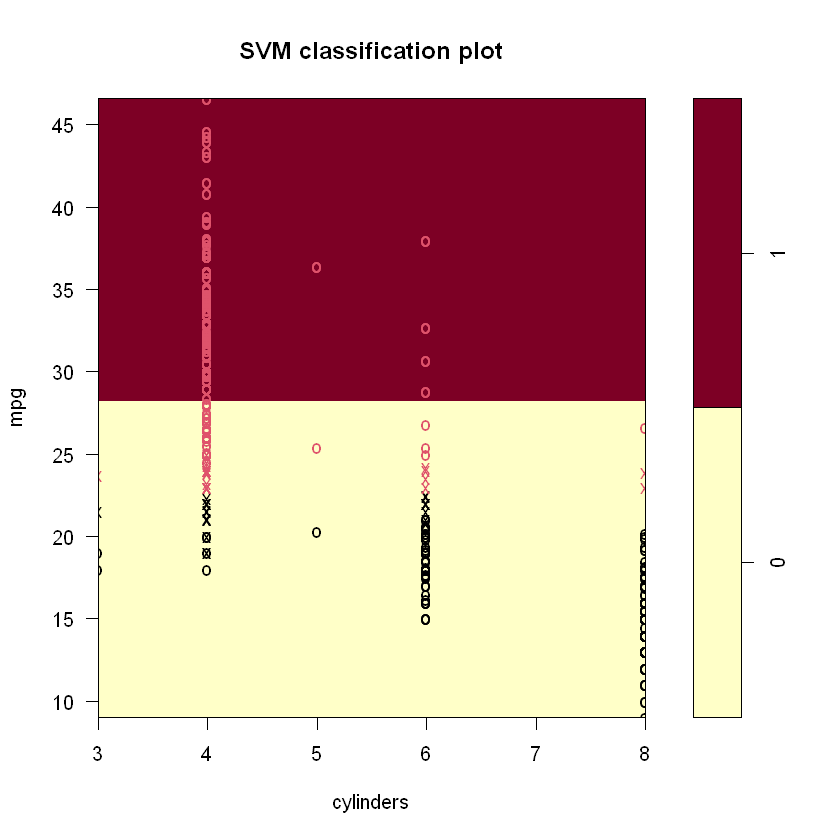

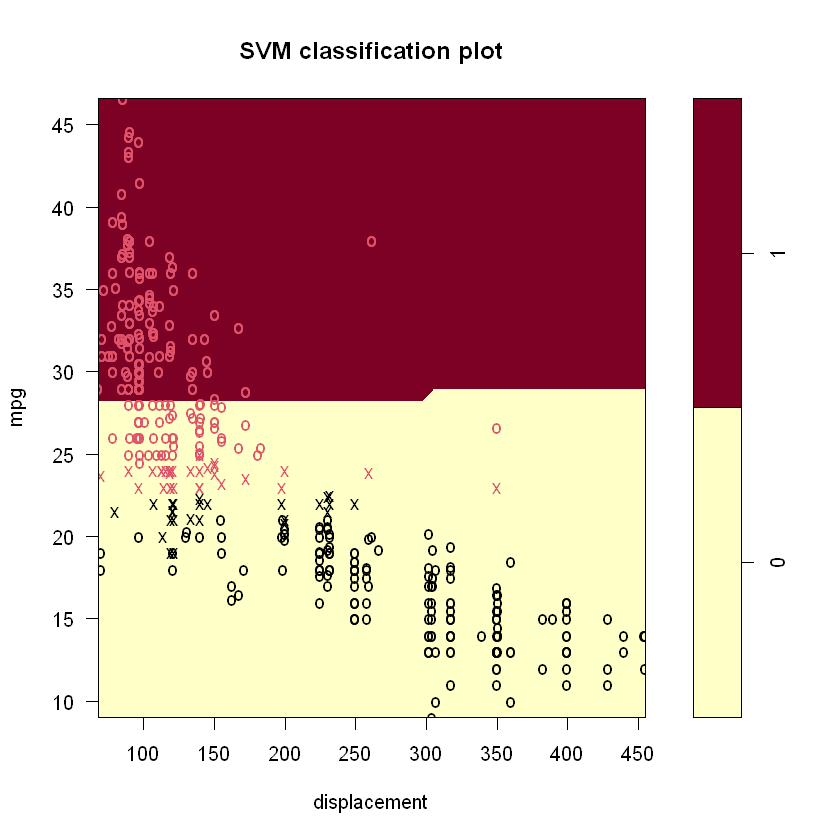

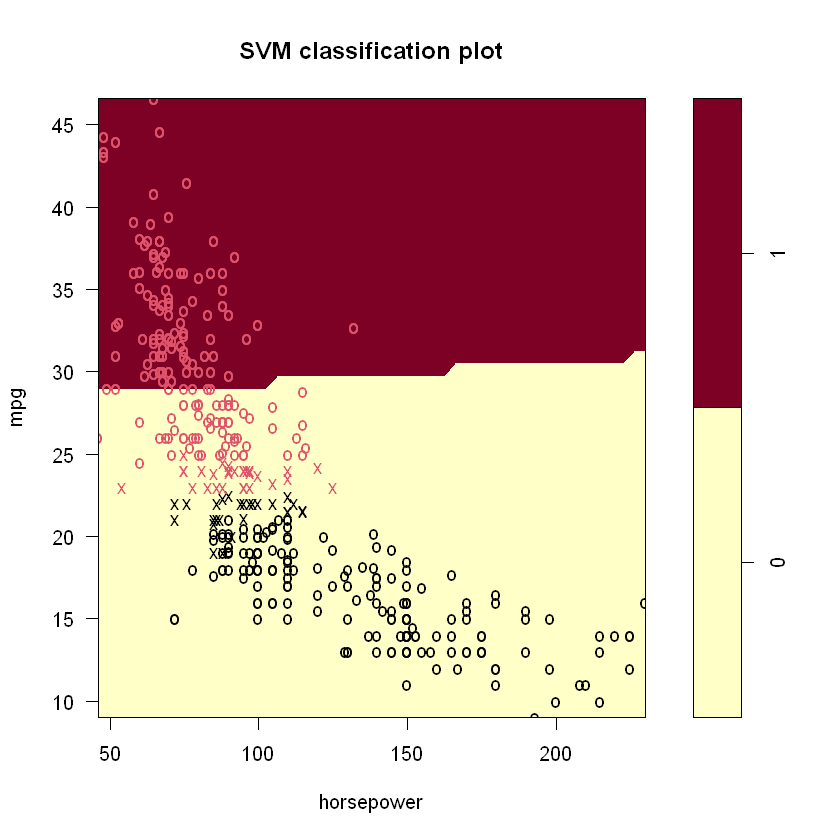

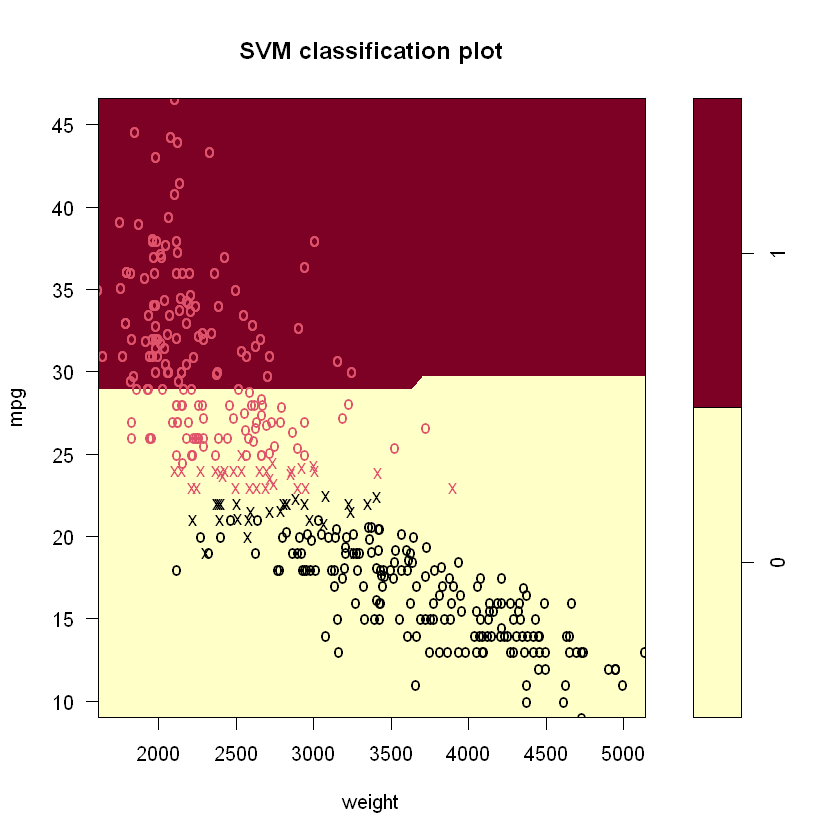

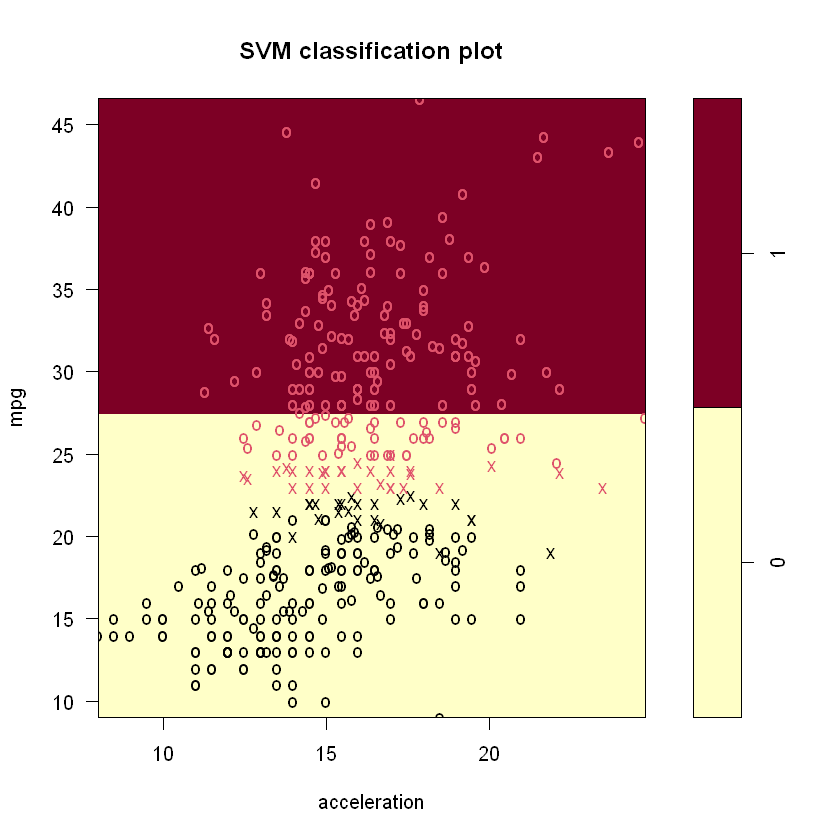

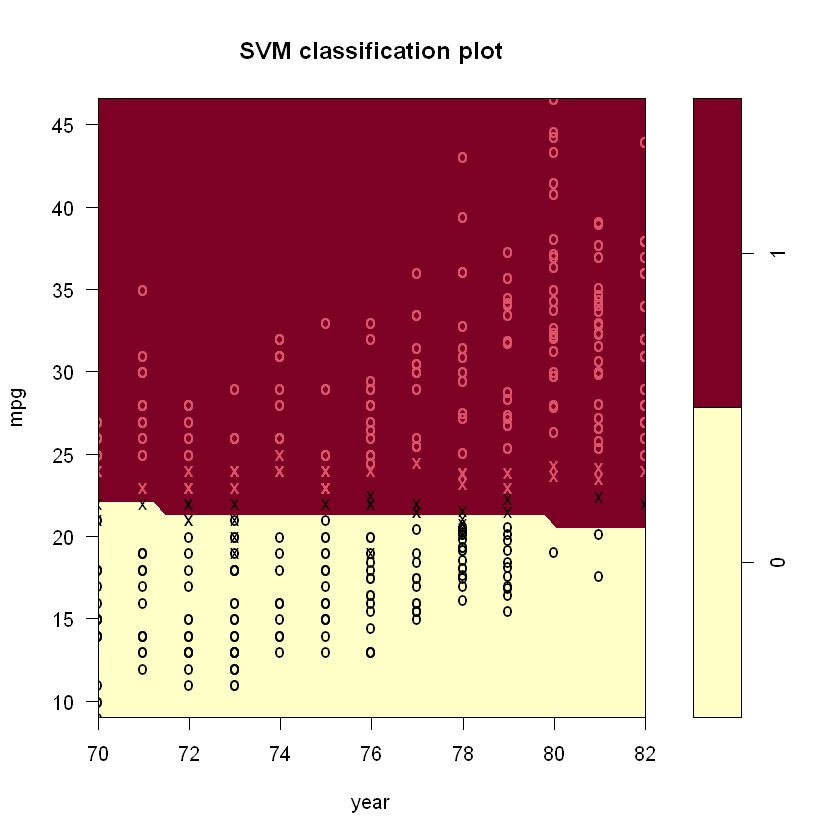

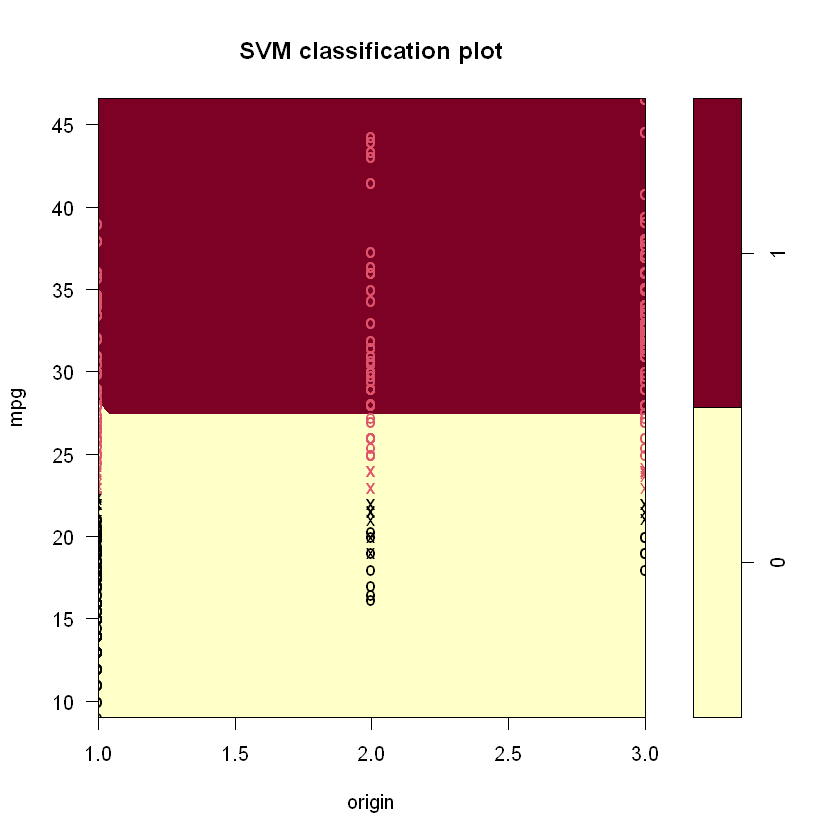

In [32]:
#Exercise 9D:Make some plots to back up your assertions in (b) and (c)
svm.lin <- svm(mpglevel ~ ., data = Auto, kernel = "linear", cost = 1)
svm.poly <- svm(mpglevel ~ ., data = Auto, kernel = "polynomial", cost = 100, degree = 2)
svm.rad <- svm(mpglevel ~ ., data = Auto, kernel = "radial", cost = 100, gamma = 0.01)
plotpairs = function(fit) {
    for (name in names(Auto)[!(names(Auto) %in% c("mpg", "mpglevel", "name"))]) {
        plot(fit, Auto, as.formula(paste("mpg~", name, sep = "")))
    }
}
plotpairs(svm.lin)

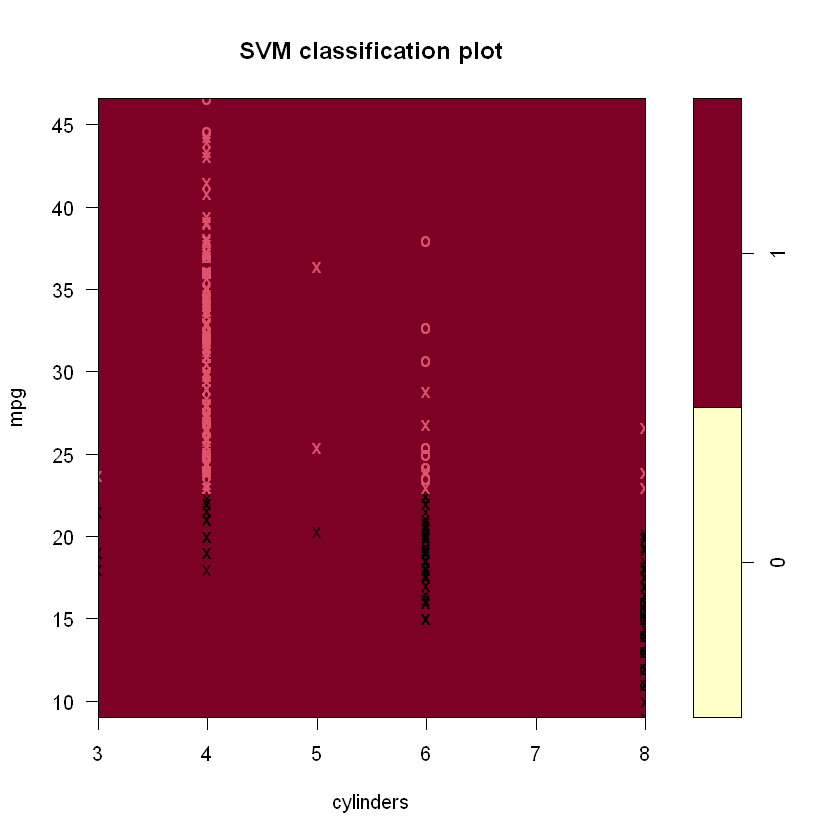

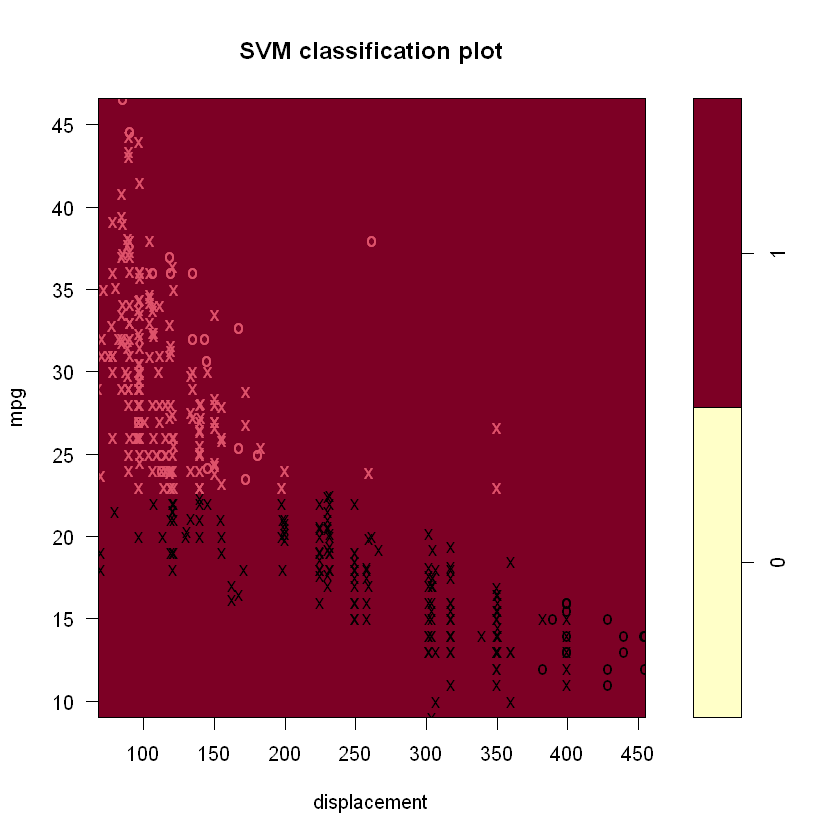

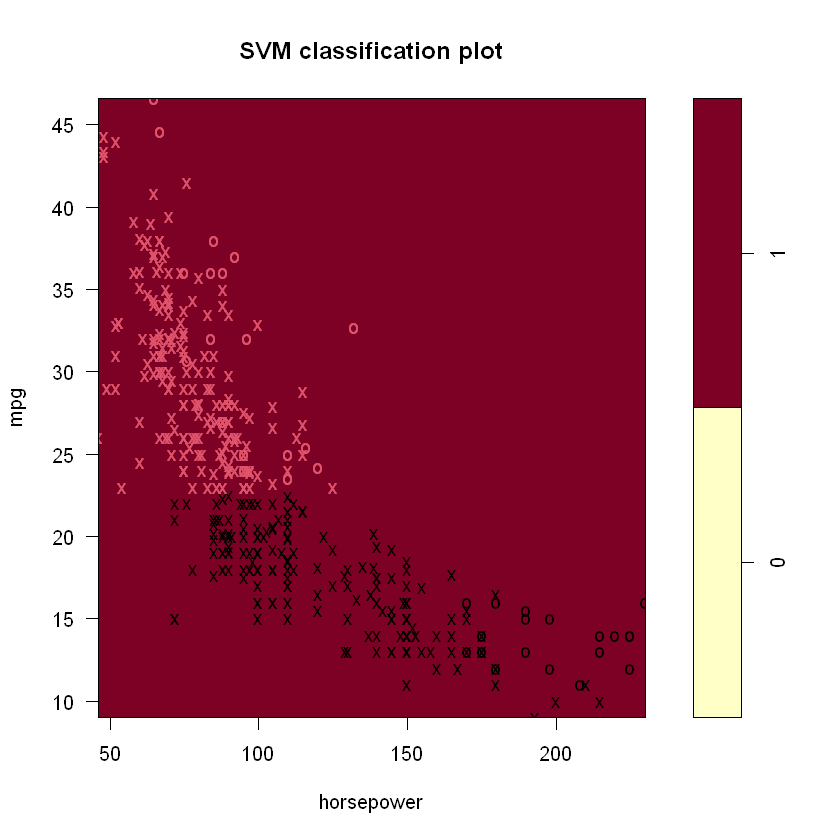

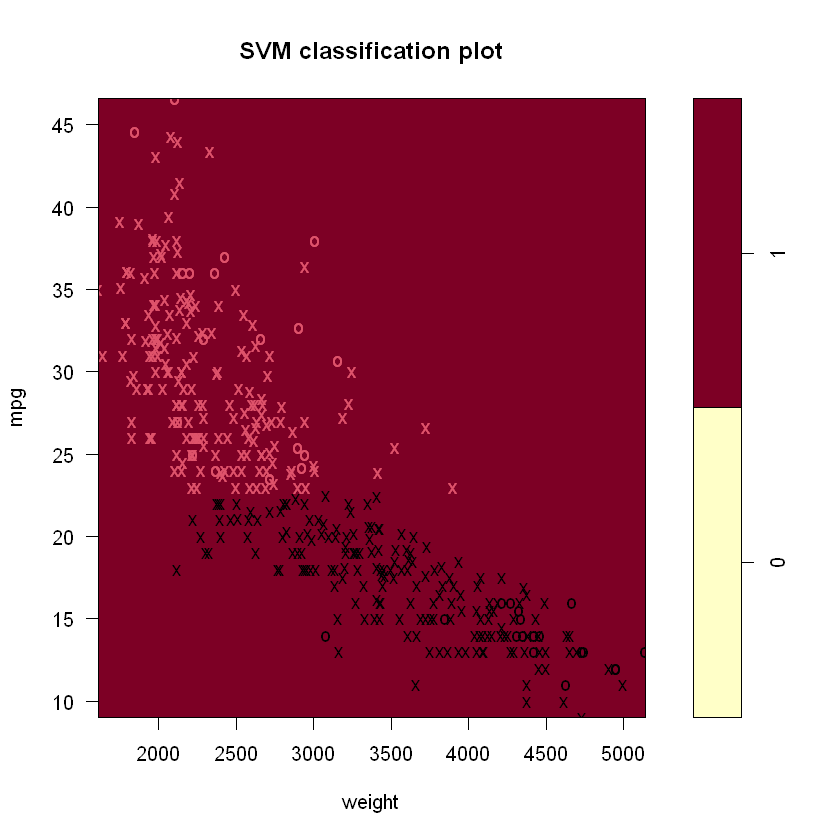

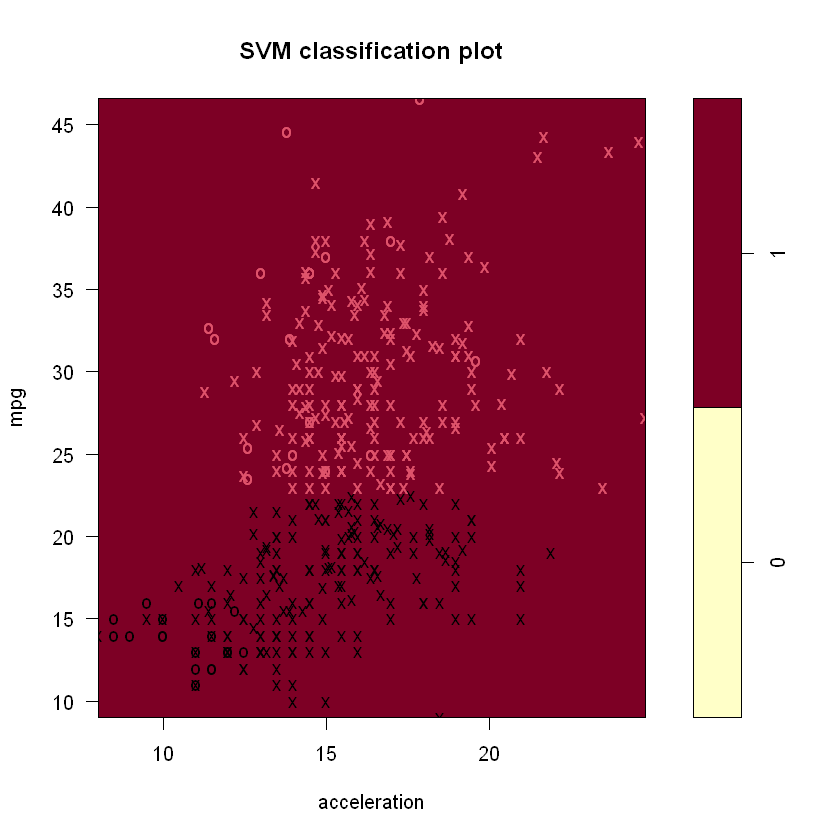

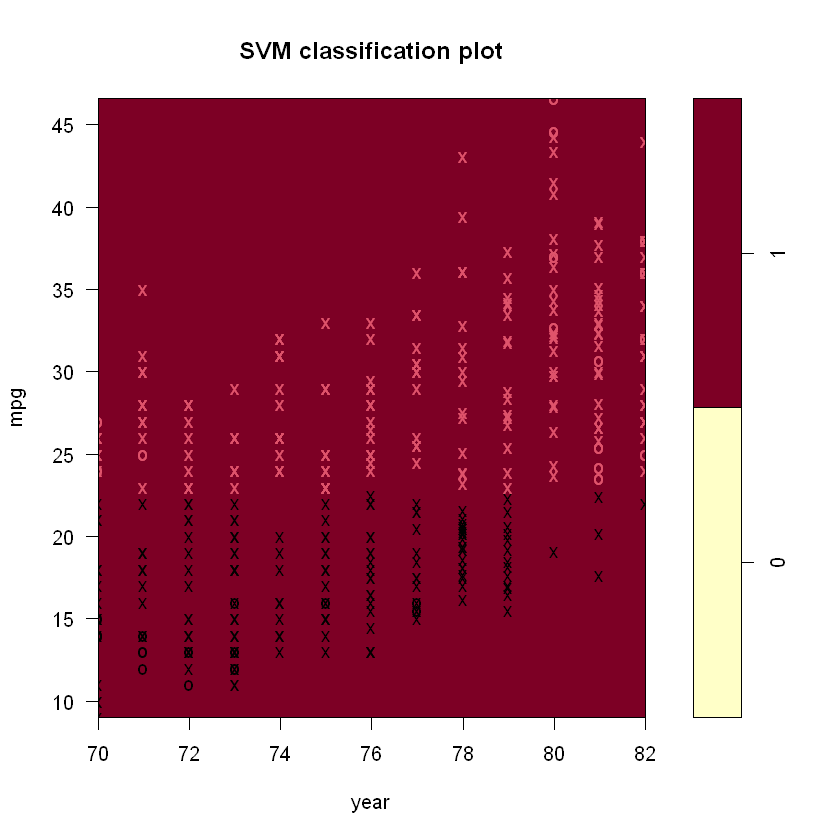

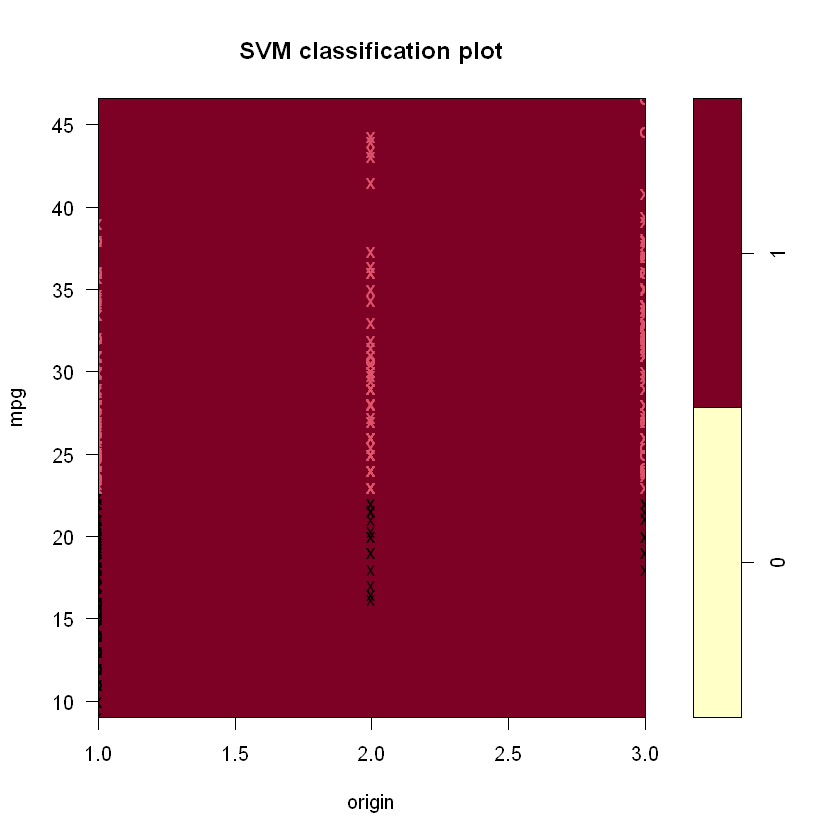

In [33]:
plotpairs(svm.poly)

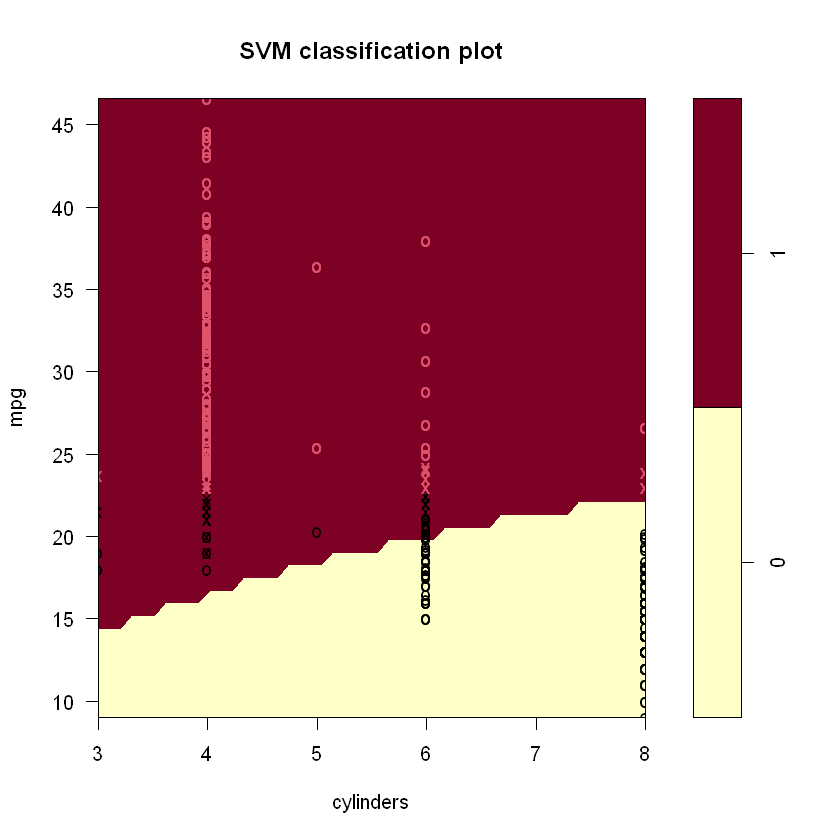

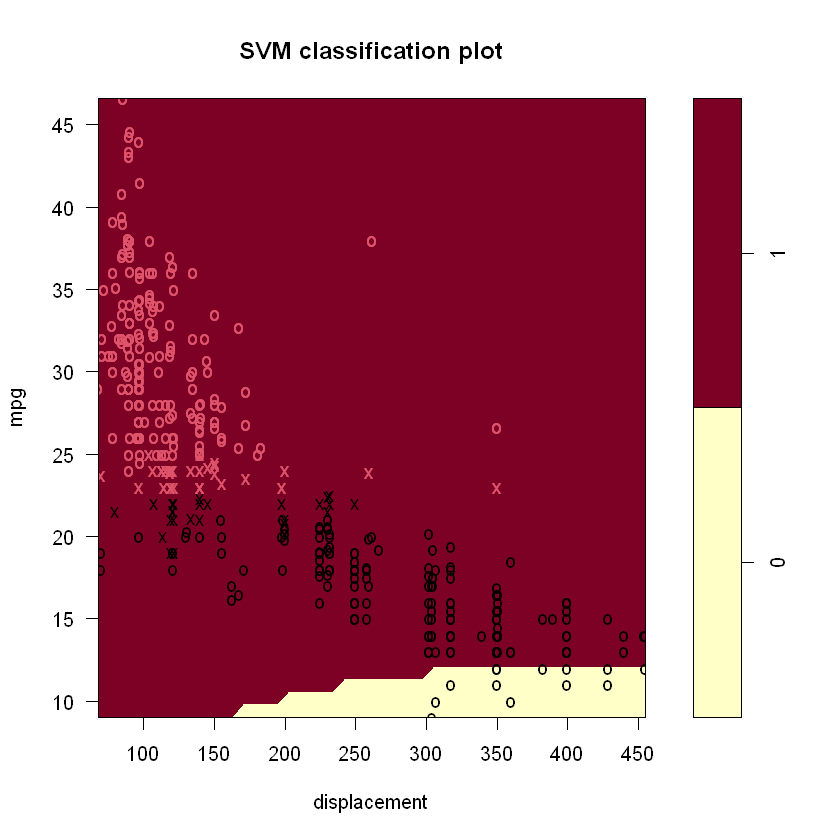

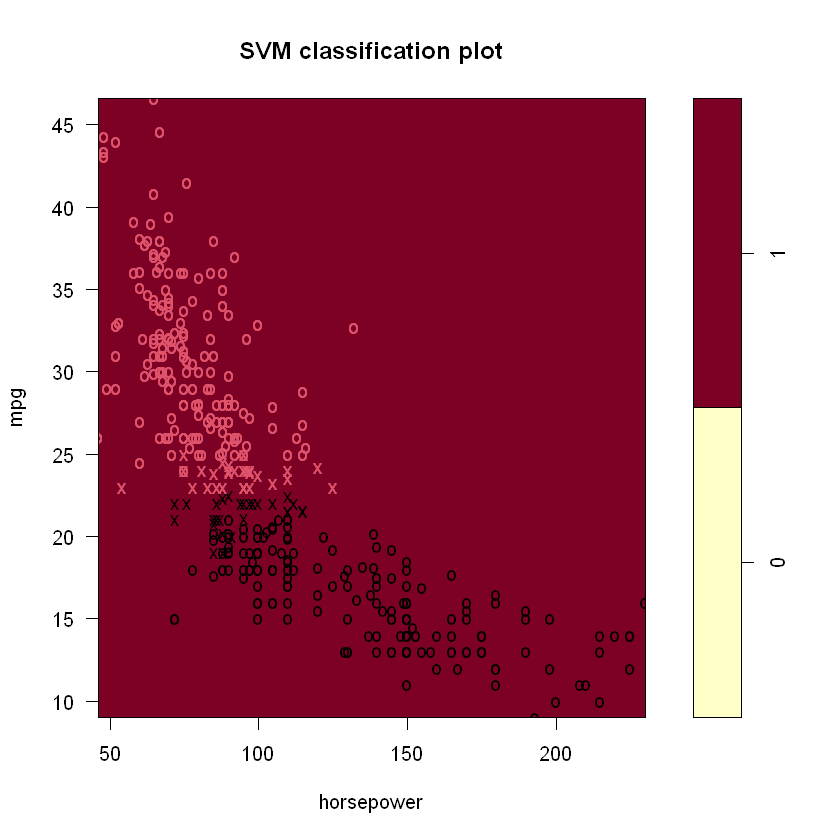

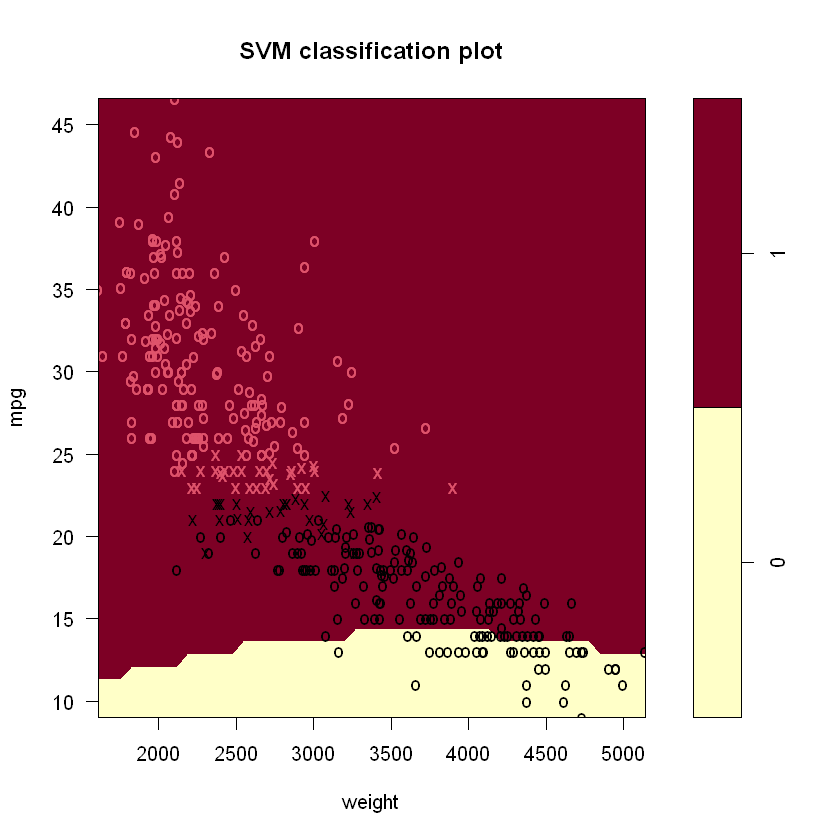

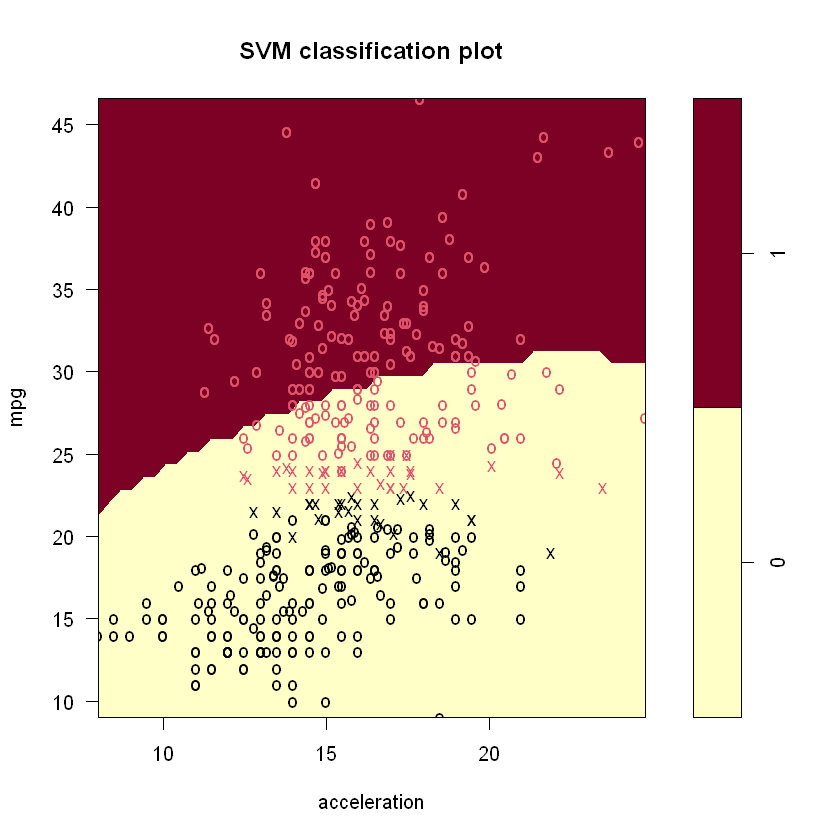

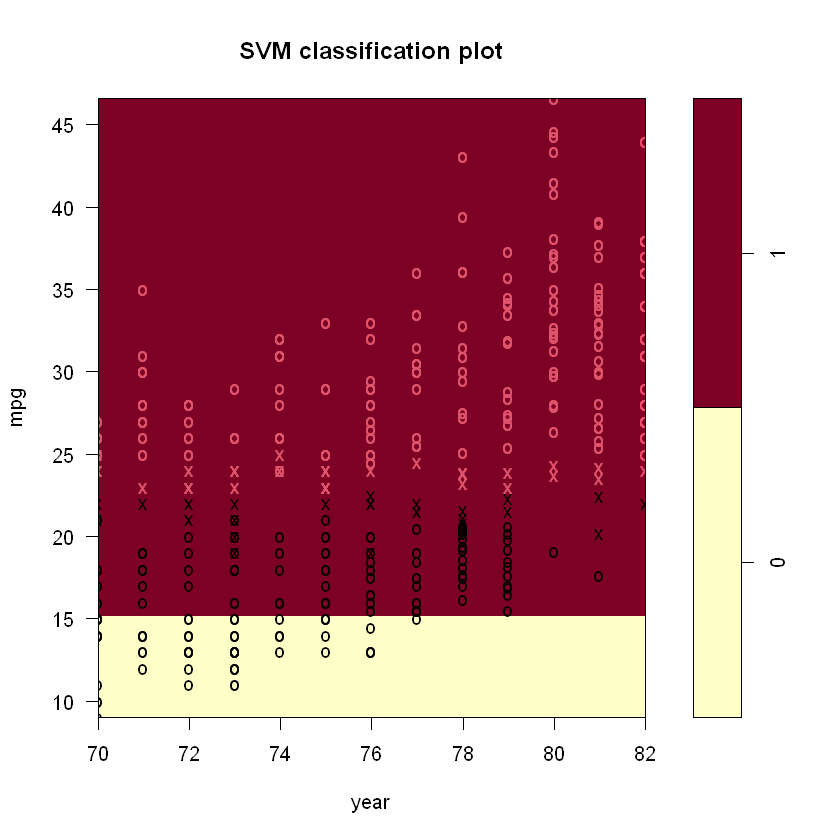

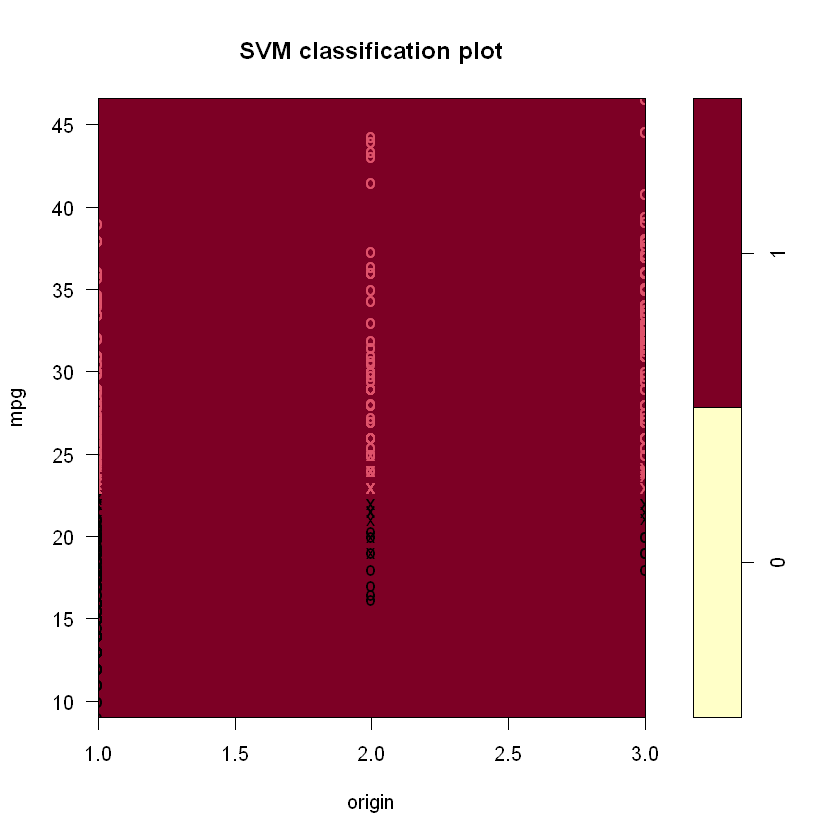

In [34]:
plotpairs(svm.rad)

In [35]:
#Exercise 8:This problem involves the OJ data set which is part of the ISLR package
#Exercise 8A:Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.
set.seed(2)
train <- sample(nrow(OJ), 800)
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

In [36]:
#Exercise 8B:Fit a support vector classifier to the training data using “cost” = 0.01, with “Purchase” as the response and the other variables as predictors.
svm.lin <- svm(Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)
summary(svm.lin)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "linear", cost = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  426

 ( 212 214 )


Number of Classes:  2 

Levels: 
 CH MM




In [41]:
#Exercise 8C:What are the training and test error rates?
train.pred <- predict(svm.lin, OJ.train)
table(OJ.train$Purchase, train.pred)

(73 + 60) / (430 + 237 + 73 + 60)

    train.pred
      CH  MM
  CH 430  60
  MM  73 237

[1] 0.16625

In [42]:
test.pred <- predict(svm.lin, OJ.test)
table(OJ.test$Purchase, test.pred)

(33 + 19) / (144 + 74 + 33 + 19)

    test.pred
      CH  MM
  CH 144  19
  MM  33  74

[1] 0.1925926

In [43]:
#Exercise 8D:Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.
set.seed(5)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "linear", ranges = list(cost = 10^seq(-2, 1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 3.162278

- best performance: 0.16 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.17125 0.02638523
2   0.01778279 0.17125 0.02949223
3   0.03162278 0.16750 0.02648375
4   0.05623413 0.16750 0.02140872
5   0.10000000 0.16625 0.02285978
6   0.17782794 0.16875 0.02585349
7   0.31622777 0.16750 0.02443813
8   0.56234133 0.16625 0.02128673
9   1.00000000 0.16625 0.02285978
10  1.77827941 0.16500 0.02266912
11  3.16227766 0.16000 0.02188988
12  5.62341325 0.16500 0.02486072
13 10.00000000 0.16375 0.02598744


In [45]:
#Exercise 8E:Compute the training and test error rates using this new value for cost.
svm.lin <- svm(Purchase ~ ., kernel = "linear", data = OJ.train, cost = tune.out$best.parameter$cost)
train.pred <- predict(svm.lin, OJ.train)
table(OJ.train$Purchase, train.pred)

(71 + 57) / (433 + 239 + 71 + 57)

    train.pred
      CH  MM
  CH 433  57
  MM  71 239

[1] 0.16

In [47]:
test.pred <- predict(svm.lin, OJ.test)
table(OJ.test$Purchase, test.pred)

(30 + 20) / (143 + 77 + 30 + 20)

#The best cost is 16% and test error is 18.5%

    test.pred
      CH  MM
  CH 143  20
  MM  30  77

[1] 0.1851852

In [50]:
#Exercise 8F:Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for “gamma”.
svm.rad <- svm(Purchase ~ ., kernel = "radial", data = OJ.train)
summary(svm.rad)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  355

 ( 175 180 )


Number of Classes:  2 

Levels: 
 CH MM




In [52]:
train.pred <- predict(svm.rad, OJ.train)
table(OJ.train$Purchase, train.pred)

(63 + 41) / (449 + 247 + 63 + 41)

    train.pred
      CH  MM
  CH 449  41
  MM  63 247

[1] 0.13

In [54]:
test.pred <- predict(svm.rad, OJ.test)
table(OJ.test$Purchase, test.pred)

(33 + 20) / (143 + 74 + 33 + 20)

    test.pred
      CH  MM
  CH 143  20
  MM  33  74

[1] 0.1962963

In [55]:
set.seed(3)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "radial", ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
     cost
 1.778279

- best performance: 0.16375 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38750 0.04965156
2   0.01778279 0.38750 0.04965156
3   0.03162278 0.35250 0.07115125
4   0.05623413 0.19375 0.05111602
5   0.10000000 0.18250 0.05688683
6   0.17782794 0.18000 0.06015027
7   0.31622777 0.17750 0.05329426
8   0.56234133 0.17125 0.05466120
9   1.00000000 0.17375 0.05696307
10  1.77827941 0.16375 0.04693746
11  3.16227766 0.16625 0.04931827
12  5.62341325 0.16875 0.04649149
13 10.00000000 0.17500 0.04289846


In [56]:
svm.rad <- svm(Purchase ~ ., kernel = "radial", data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.rad)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "radial", cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1.778279 

Number of Support Vectors:  334

 ( 163 171 )


Number of Classes:  2 

Levels: 
 CH MM




In [58]:
train.pred <- predict(svm.rad, OJ.train)
table(OJ.train$Purchase, train.pred)

(64 + 41) / (449 + 246 + 64 + 41)

    train.pred
      CH  MM
  CH 449  41
  MM  64 246

[1] 0.13125

In [60]:
test.pred <- predict(svm.rad, OJ.test)
table(OJ.test$Purchase, test.pred)

(32 + 21) / (142 + 75 + 32 + 21)

    test.pred
      CH  MM
  CH 142  21
  MM  32  75

[1] 0.1962963

In [61]:
#Exercise 9G: Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set “degree” = 2.
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", data = OJ.train, degree = 2)
summary(svm.poly)


Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  440

 ( 218 222 )


Number of Classes:  2 

Levels: 
 CH MM




In [64]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

(106 + 36) / (454 + 204 + 106 + 36)

    train.pred
      CH  MM
  CH 454  36
  MM 106 204

[1] 0.1775

In [66]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

(41 + 12) / (151 + 66 + 41 + 12)

    test.pred
      CH  MM
  CH 151  12
  MM  41  66

[1] 0.1962963

In [84]:
set.seed(5)
tune.out <- tune(svm, Purchase ~ ., data = OJ.train, kernel = "polynomial", degree = 2, ranges = list(cost = 10^seq(-2, 
    1, by = 0.25)))
summary(tune.out)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
   10

- best performance: 0.1725 

- Detailed performance results:
          cost   error dispersion
1   0.01000000 0.38250 0.06697844
2   0.01778279 0.36375 0.06386020
3   0.03162278 0.35375 0.06402311
4   0.05623413 0.33125 0.06353313
5   0.10000000 0.30875 0.05864500
6   0.17782794 0.24500 0.03545341
7   0.31622777 0.20750 0.04005205
8   0.56234133 0.20875 0.03998698
9   1.00000000 0.20000 0.03004626
10  1.77827941 0.19500 0.03343734
11  3.16227766 0.18750 0.02568506
12  5.62341325 0.17750 0.02188988
13 10.00000000 0.17250 0.02108185


In [85]:
svm.poly <- svm(Purchase ~ ., kernel = "polynomial", degree = 2, data = OJ.train, cost = tune.out$best.parameter$cost)
summary(svm.poly)



Call:
svm(formula = Purchase ~ ., data = OJ.train, kernel = "polynomial", 
    degree = 2, cost = tune.out$best.parameter$cost)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  2 
     coef.0:  0 

Number of Support Vectors:  329

 ( 163 166 )


Number of Classes:  2 

Levels: 
 CH MM




In [86]:
train.pred <- predict(svm.poly, OJ.train)
table(OJ.train$Purchase, train.pred)

(66 + 38) / (452 + 244 + 66 + 38)

    train.pred
      CH  MM
  CH 452  38
  MM  66 244

[1] 0.13

In [88]:
test.pred <- predict(svm.poly, OJ.test)
table(OJ.test$Purchase, test.pred)

(32 + 22) / (141 + 75 + 32 + 22)

    test.pred
      CH  MM
  CH 141  22
  MM  32  75

[1] 0.2

Exercise 9H:Overall, which approach seems to give the best results on this data ?
The radial basis kernel produced minimum misclassification error on both train and test dataset.